In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5172720


In [5]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5172720/sandbox’: File exists


In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5172720/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [20]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [10]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [9]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [10]:
traintest.num_dataset()

5

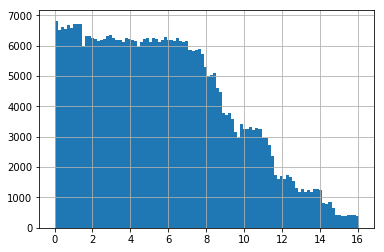

In [11]:
traintest.ydf.hist(bins=100);

In [12]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [13]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [14]:
data=traintest.traindf
data.head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_90    fwv_91    fwv_92    fwv_93    fwv_94  \
index                                                                  
quake_14_o38092704  0.151000  0.119633  0.019761  0.043149  0.216871   
quake_05_o21076314  0.095466  0.173315  0.101008  0.032328  0.010907   
quake_09_o34152517  0.085560  0.195082  0.087095  0.034098 -0.026654   
quake_07_o29907005  0.127455  0.154124  0.055500  0.069783  0.097929   
quake_03_o11370843  0.070768  0.203573  0.129579  0.062429 -0.040362   

                      fwv_95    fwv_96    fwv_97    fwv_98    fwv_99  
index                                                                 
quake_14_o38092704  0.032755  0.095359 -0.141673 -0.095935  0.154893  
quake_05_o21076314  0.033171  0.027125 -0.087466 -0.007180  0.079947  
quake_09_o34152517  0.023064  0.001101 -0.098248  0.031839  0.082902  
quake_07_o29907005  0.058242  0.032560 -0.102489 -0.025202  0.069889  
quake_03_o11370843  0.015726  0.013697 -0.070627  0.042443 -0.026576  

[5 rows x 100 columns]

In [15]:
ydf=traintest.ydf
ydf.head()

index
quake_14_o38092704    4.818398
quake_05_o21076314    2.541899
quake_09_o34152517    0.727197
quake_07_o29907005    8.299899
quake_03_o11370843    5.864797
Name: y, dtype: float64

In [16]:
qdf=pd.DataFrame(data.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=data.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [17]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3767  29616  36387  22727  32577  20671  18114  41335  20288  24728   

          10     11     12     13     14     15    16  
index  29324  28291  22654  21979  37857  24275  4769

In [18]:
qlen=qdf['index'].value_counts().to_dict()
qlen

{0: 3767,
 1: 29616,
 2: 36387,
 3: 22727,
 4: 32577,
 5: 20671,
 6: 18114,
 7: 41335,
 8: 20288,
 9: 24728,
 10: 29324,
 11: 28291,
 12: 22654,
 13: 21979,
 14: 37857,
 15: 24275,
 16: 4769}

In [19]:
quakes=set(qdf['index'])
quakes

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [20]:
import utils
n_thread= utils.get_num_thread()
n_thread

3

In [21]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=data[tridx],ydf[tridx],data[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [22]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [23]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  0 0 (nan, nan)
valid quake 1 train quake 0
(3767, 100) (3767,) (29616, 100) (29616,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.233586	valid_1's l1: 5.05818
[100]	training's l1: 0.153796	valid_1's l1: 5.052
[150]	training's l1: 0.103421	valid_1's l1: 5.04643
[200]	training's l1: 0.0714234	valid_1's l1: 5.04201
[250]	training's l1: 0.0511615	valid_1's l1: 5.04107
[300]	training's l1: 0.0381467	valid_1's l1: 5.04017
[350]	training's l1: 0.0303846	valid_1's l1: 5.04045
[400]	training's l1: 0.0258331	valid_1's l1: 5.04192
[450]	training's l1: 0.0231693	valid_1's l1: 5.04339
[500]	training's l1: 0.0215534	valid_1's l1: 5.04363
Early stopping, best iteration is:
[300]	training's l1: 0.0381467	valid_1's l1: 5.04017
quake  0 1 (5.040169684308053, 300)
valid quake 2 train quake 0
(3767, 100) (3767,) (36387, 100) (36387,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.233586	valid_1's l1: 6.29927
[100]	trainin

[50]	training's l1: 0.233586	valid_1's l1: 3.66384
[100]	training's l1: 0.153796	valid_1's l1: 3.60824
[150]	training's l1: 0.103421	valid_1's l1: 3.56966
[200]	training's l1: 0.0714234	valid_1's l1: 3.54579
[250]	training's l1: 0.0511615	valid_1's l1: 3.5344
[300]	training's l1: 0.0381467	valid_1's l1: 3.52724
[350]	training's l1: 0.0303846	valid_1's l1: 3.52454
[400]	training's l1: 0.0258331	valid_1's l1: 3.52467
[450]	training's l1: 0.0231693	valid_1's l1: 3.52527
[500]	training's l1: 0.0215534	valid_1's l1: 3.52472
[550]	training's l1: 0.0204661	valid_1's l1: 3.52361
[600]	training's l1: 0.0195879	valid_1's l1: 3.52313
[650]	training's l1: 0.018803	valid_1's l1: 3.52411
[700]	training's l1: 0.0180525	valid_1's l1: 3.524
[750]	training's l1: 0.0174667	valid_1's l1: 3.52447
Early stopping, best iteration is:
[595]	training's l1: 0.0196661	valid_1's l1: 3.52294
quake  0 12 (3.522941205142074, 595)
valid quake 13 train quake 0
(3767, 100) (3767,) (21979, 100) (21979,)
Training until va

[550]	training's l1: 0.306337	valid_1's l1: 3.11686
[600]	training's l1: 0.295807	valid_1's l1: 3.11624
[650]	training's l1: 0.285859	valid_1's l1: 3.11623
[700]	training's l1: 0.277592	valid_1's l1: 3.11648
[750]	training's l1: 0.270119	valid_1's l1: 3.11599
[800]	training's l1: 0.263606	valid_1's l1: 3.11684
[850]	training's l1: 0.257155	valid_1's l1: 3.11788
[900]	training's l1: 0.251307	valid_1's l1: 3.11789
Early stopping, best iteration is:
[719]	training's l1: 0.274566	valid_1's l1: 3.1158
quake  1 7 (3.115804928800473, 719)
valid quake 8 train quake 1
(29616, 100) (29616,) (20288, 100) (20288,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07589	valid_1's l1: 3.05732
[100]	training's l1: 0.727637	valid_1's l1: 3.08643
[150]	training's l1: 0.563025	valid_1's l1: 3.10354
[200]	training's l1: 0.477691	valid_1's l1: 3.10995
Early stopping, best iteration is:
[2]	training's l1: 2.68758	valid_1's l1: 2.37097
quake  1 8 (2.370974640299744, 2)
val

[1500]	training's l1: 0.289791	valid_1's l1: 6.11069
quake  2 0 (6.110694041687243, 0)
valid quake 1 train quake 2
(36387, 100) (36387,) (29616, 100) (29616,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.35375	valid_1's l1: 2.66024
[100]	training's l1: 0.950925	valid_1's l1: 2.78633
[150]	training's l1: 0.769994	valid_1's l1: 2.85855
[200]	training's l1: 0.676651	valid_1's l1: 2.89372
Early stopping, best iteration is:
[12]	training's l1: 2.3637	valid_1's l1: 2.45946
quake  2 1 (2.459464994508237, 12)
quake  2 2 (nan, nan)
valid quake 3 train quake 2
(36387, 100) (36387,) (22727, 100) (22727,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.35375	valid_1's l1: 3.76378
[100]	training's l1: 0.950925	valid_1's l1: 3.75178
[150]	training's l1: 0.769994	valid_1's l1: 3.75749
[200]	training's l1: 0.676651	valid_1's l1: 3.76754
Early stopping, best iteration is:
[1]	training's l1: 3.43116	valid_1's l1: 2.9977
quake  

[350]	training's l1: 0.185858	valid_1's l1: 2.42542
[400]	training's l1: 0.175299	valid_1's l1: 2.41166
[450]	training's l1: 0.167348	valid_1's l1: 2.40446
[500]	training's l1: 0.160295	valid_1's l1: 2.40268
[550]	training's l1: 0.154574	valid_1's l1: 2.40142
[600]	training's l1: 0.149301	valid_1's l1: 2.40121
[650]	training's l1: 0.144817	valid_1's l1: 2.40005
[700]	training's l1: 0.140774	valid_1's l1: 2.40007
[750]	training's l1: 0.13704	valid_1's l1: 2.40032
[800]	training's l1: 0.133686	valid_1's l1: 2.40057
Early stopping, best iteration is:
[644]	training's l1: 0.145346	valid_1's l1: 2.39992
quake  3 0 (2.3999214636877944, 644)
valid quake 1 train quake 3
(22727, 100) (22727,) (29616, 100) (29616,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.780861	valid_1's l1: 2.33202
[100]	training's l1: 0.493596	valid_1's l1: 2.26107
[150]	training's l1: 0.34795	valid_1's l1: 2.23408
[200]	training's l1: 0.26733	valid_1's l1: 2.22899
[250]	training's 

[800]	training's l1: 0.133686	valid_1's l1: 0.909153
[850]	training's l1: 0.1306	valid_1's l1: 0.907728
[900]	training's l1: 0.127622	valid_1's l1: 0.907271
[950]	training's l1: 0.12486	valid_1's l1: 0.907177
[1000]	training's l1: 0.122324	valid_1's l1: 0.906582
[1050]	training's l1: 0.119948	valid_1's l1: 0.905987
[1100]	training's l1: 0.117679	valid_1's l1: 0.905426
[1150]	training's l1: 0.115434	valid_1's l1: 0.904471
[1200]	training's l1: 0.11333	valid_1's l1: 0.904639
[1250]	training's l1: 0.111401	valid_1's l1: 0.903662
[1300]	training's l1: 0.109551	valid_1's l1: 0.903193
[1350]	training's l1: 0.107708	valid_1's l1: 0.902419
[1400]	training's l1: 0.105952	valid_1's l1: 0.901596
[1450]	training's l1: 0.10437	valid_1's l1: 0.901477
[1500]	training's l1: 0.102779	valid_1's l1: 0.901101
quake  3 12 (0.9011011761946084, 0)
valid quake 13 train quake 3
(22727, 100) (22727,) (21979, 100) (21979,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.78086

[1000]	training's l1: 0.237108	valid_1's l1: 2.75388
[1050]	training's l1: 0.23235	valid_1's l1: 2.75424
[1100]	training's l1: 0.227922	valid_1's l1: 2.75306
[1150]	training's l1: 0.223756	valid_1's l1: 2.75251
[1200]	training's l1: 0.219963	valid_1's l1: 2.7527
[1250]	training's l1: 0.216176	valid_1's l1: 2.75261
[1300]	training's l1: 0.212683	valid_1's l1: 2.75142
[1350]	training's l1: 0.209411	valid_1's l1: 2.74917
[1400]	training's l1: 0.206229	valid_1's l1: 2.74789
[1450]	training's l1: 0.203014	valid_1's l1: 2.74789
[1500]	training's l1: 0.2	valid_1's l1: 2.7461
quake  4 6 (2.7460968581220775, 0)
valid quake 7 train quake 4
(32577, 100) (32577,) (41335, 100) (41335,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.08547	valid_1's l1: 4.07945
[100]	training's l1: 0.708858	valid_1's l1: 4.27243
[150]	training's l1: 0.545823	valid_1's l1: 4.36803
[200]	training's l1: 0.464138	valid_1's l1: 4.41439
Early stopping, best iteration is:
[19]	training'

[200]	training's l1: 0.27501	valid_1's l1: 3.2177
Early stopping, best iteration is:
[39]	training's l1: 0.861716	valid_1's l1: 3.1302
quake  5 4 (3.1302043570847466, 39)
quake  5 5 (nan, nan)
valid quake 6 train quake 5
(20671, 100) (20671,) (18114, 100) (18114,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.763183	valid_1's l1: 1.07681
[100]	training's l1: 0.495495	valid_1's l1: 0.985551
[150]	training's l1: 0.352094	valid_1's l1: 0.952245
[200]	training's l1: 0.27501	valid_1's l1: 0.938377
[250]	training's l1: 0.235008	valid_1's l1: 0.92765
[300]	training's l1: 0.21259	valid_1's l1: 0.9207
[350]	training's l1: 0.197106	valid_1's l1: 0.920846
[400]	training's l1: 0.185775	valid_1's l1: 0.918782
[450]	training's l1: 0.176461	valid_1's l1: 0.916853
[500]	training's l1: 0.168169	valid_1's l1: 0.917925
[550]	training's l1: 0.161098	valid_1's l1: 0.918751
[600]	training's l1: 0.155216	valid_1's l1: 0.91923
[650]	training's l1: 0.1502	valid_1's l1: 0.

[350]	training's l1: 0.169162	valid_1's l1: 2.71335
[400]	training's l1: 0.15806	valid_1's l1: 2.71048
[450]	training's l1: 0.149975	valid_1's l1: 2.70844
[500]	training's l1: 0.143004	valid_1's l1: 2.70711
[550]	training's l1: 0.137182	valid_1's l1: 2.70498
[600]	training's l1: 0.132113	valid_1's l1: 2.70452
[650]	training's l1: 0.12765	valid_1's l1: 2.70415
[700]	training's l1: 0.123881	valid_1's l1: 2.70342
[750]	training's l1: 0.12033	valid_1's l1: 2.70223
[800]	training's l1: 0.117181	valid_1's l1: 2.70163
[850]	training's l1: 0.114268	valid_1's l1: 2.70104
[900]	training's l1: 0.111745	valid_1's l1: 2.69987
[950]	training's l1: 0.109369	valid_1's l1: 2.69906
[1000]	training's l1: 0.107177	valid_1's l1: 2.69858
[1050]	training's l1: 0.105018	valid_1's l1: 2.69799
[1100]	training's l1: 0.103042	valid_1's l1: 2.69736
[1150]	training's l1: 0.101158	valid_1's l1: 2.69675
[1200]	training's l1: 0.0994082	valid_1's l1: 2.69576
[1250]	training's l1: 0.0976553	valid_1's l1: 2.69461
[1300]	

[250]	training's l1: 0.20556	valid_1's l1: 0.909306
[300]	training's l1: 0.183877	valid_1's l1: 0.898689
[350]	training's l1: 0.169162	valid_1's l1: 0.894705
[400]	training's l1: 0.15806	valid_1's l1: 0.892077
[450]	training's l1: 0.149975	valid_1's l1: 0.89119
[500]	training's l1: 0.143004	valid_1's l1: 0.890545
[550]	training's l1: 0.137182	valid_1's l1: 0.890439
[600]	training's l1: 0.132113	valid_1's l1: 0.891072
[650]	training's l1: 0.12765	valid_1's l1: 0.890335
[700]	training's l1: 0.123881	valid_1's l1: 0.890226
[750]	training's l1: 0.12033	valid_1's l1: 0.890071
[800]	training's l1: 0.117181	valid_1's l1: 0.889771
[850]	training's l1: 0.114268	valid_1's l1: 0.889944
[900]	training's l1: 0.111745	valid_1's l1: 0.889814
[950]	training's l1: 0.109369	valid_1's l1: 0.889507
[1000]	training's l1: 0.107177	valid_1's l1: 0.889041
[1050]	training's l1: 0.105018	valid_1's l1: 0.889378
[1100]	training's l1: 0.103042	valid_1's l1: 0.889353
[1150]	training's l1: 0.101158	valid_1's l1: 0.8

[250]	training's l1: 0.20556	valid_1's l1: 1.17501
[300]	training's l1: 0.183877	valid_1's l1: 1.16627
[350]	training's l1: 0.169162	valid_1's l1: 1.15988
[400]	training's l1: 0.15806	valid_1's l1: 1.15664
[450]	training's l1: 0.149975	valid_1's l1: 1.15453
[500]	training's l1: 0.143004	valid_1's l1: 1.15215
[550]	training's l1: 0.137182	valid_1's l1: 1.15086
[600]	training's l1: 0.132113	valid_1's l1: 1.1513
[650]	training's l1: 0.12765	valid_1's l1: 1.15087
[700]	training's l1: 0.123881	valid_1's l1: 1.15007
[750]	training's l1: 0.12033	valid_1's l1: 1.14965
[800]	training's l1: 0.117181	valid_1's l1: 1.149
[850]	training's l1: 0.114268	valid_1's l1: 1.14848
[900]	training's l1: 0.111745	valid_1's l1: 1.14813
[950]	training's l1: 0.109369	valid_1's l1: 1.14762
[1000]	training's l1: 0.107177	valid_1's l1: 1.14721
[1050]	training's l1: 0.105018	valid_1's l1: 1.14703
[1100]	training's l1: 0.103042	valid_1's l1: 1.14677
[1150]	training's l1: 0.101158	valid_1's l1: 1.14631
[1200]	training

[450]	training's l1: 0.664174	valid_1's l1: 2.45735
[500]	training's l1: 0.63515	valid_1's l1: 2.45348
[550]	training's l1: 0.610266	valid_1's l1: 2.44938
[600]	training's l1: 0.588859	valid_1's l1: 2.44767
[650]	training's l1: 0.569565	valid_1's l1: 2.44547
[700]	training's l1: 0.552747	valid_1's l1: 2.43818
[750]	training's l1: 0.537645	valid_1's l1: 2.43716
[800]	training's l1: 0.523066	valid_1's l1: 2.43681
[850]	training's l1: 0.510262	valid_1's l1: 2.43508
[900]	training's l1: 0.49811	valid_1's l1: 2.42624
[950]	training's l1: 0.486673	valid_1's l1: 2.41923
[1000]	training's l1: 0.475543	valid_1's l1: 2.41779
[1050]	training's l1: 0.465737	valid_1's l1: 2.4176
[1100]	training's l1: 0.456037	valid_1's l1: 2.41144
[1150]	training's l1: 0.447246	valid_1's l1: 2.41076
[1200]	training's l1: 0.438967	valid_1's l1: 2.40919
[1250]	training's l1: 0.431292	valid_1's l1: 2.40533
[1300]	training's l1: 0.424397	valid_1's l1: 2.40386
[1350]	training's l1: 0.417139	valid_1's l1: 2.39646
[1400]	

[1450]	training's l1: 0.404158	valid_1's l1: 2.49677
[1500]	training's l1: 0.398113	valid_1's l1: 2.49239
quake  7 14 (2.492385477561257, 0)
valid quake 15 train quake 7
(41335, 100) (41335,) (24275, 100) (24275,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.63979	valid_1's l1: 5.27369
[100]	training's l1: 1.20931	valid_1's l1: 5.3709
[150]	training's l1: 1.01784	valid_1's l1: 5.41833
[200]	training's l1: 0.911374	valid_1's l1: 5.43759
Early stopping, best iteration is:
[1]	training's l1: 3.89106	valid_1's l1: 3.56767
quake  7 15 (3.567669952343459, 1)
valid quake 16 train quake 7
(41335, 100) (41335,) (4769, 100) (4769,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.63979	valid_1's l1: 2.80269
[100]	training's l1: 1.20931	valid_1's l1: 3.1719
[150]	training's l1: 1.01784	valid_1's l1: 3.37116
[200]	training's l1: 0.911374	valid_1's l1: 3.46664
Early stopping, best iteration is:
[9]	training's l1: 3.03016	va

Early stopping, best iteration is:
[42]	training's l1: 0.815665	valid_1's l1: 2.58437
quake  8 11 (2.5843746526103084, 42)
valid quake 12 train quake 8
(20288, 100) (20288,) (22654, 100) (22654,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.748079	valid_1's l1: 1.35434
[100]	training's l1: 0.484253	valid_1's l1: 1.2509
[150]	training's l1: 0.341161	valid_1's l1: 1.21433
[200]	training's l1: 0.260405	valid_1's l1: 1.20286
[250]	training's l1: 0.2181	valid_1's l1: 1.19749
[300]	training's l1: 0.194778	valid_1's l1: 1.19565
[350]	training's l1: 0.178737	valid_1's l1: 1.19699
[400]	training's l1: 0.167669	valid_1's l1: 1.19812
[450]	training's l1: 0.158404	valid_1's l1: 1.19866
Early stopping, best iteration is:
[294]	training's l1: 0.19698	valid_1's l1: 1.19563
quake  8 12 (1.1956312002472775, 294)
valid quake 13 train quake 8
(20288, 100) (20288,) (21979, 100) (21979,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l

[550]	training's l1: 0.199666	valid_1's l1: 3.04158
Early stopping, best iteration is:
[366]	training's l1: 0.239258	valid_1's l1: 3.03885
quake  9 2 (3.038845080804963, 366)
valid quake 3 train quake 9
(24728, 100) (24728,) (22727, 100) (22727,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.860395	valid_1's l1: 1.11021
[100]	training's l1: 0.549629	valid_1's l1: 1.01349
[150]	training's l1: 0.399807	valid_1's l1: 0.997118
[200]	training's l1: 0.324592	valid_1's l1: 0.996934
[250]	training's l1: 0.285429	valid_1's l1: 1.00228
[300]	training's l1: 0.262108	valid_1's l1: 1.00664
[350]	training's l1: 0.244375	valid_1's l1: 1.01002
Early stopping, best iteration is:
[180]	training's l1: 0.348447	valid_1's l1: 0.995059
quake  9 3 (0.9950594214176943, 180)
valid quake 4 train quake 9
(24728, 100) (24728,) (32577, 100) (32577,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.860395	valid_1's l1: 2.28881
[100]	training

[550]	training's l1: 0.199666	valid_1's l1: 1.08176
[600]	training's l1: 0.192131	valid_1's l1: 1.0811
[650]	training's l1: 0.185893	valid_1's l1: 1.08171
[700]	training's l1: 0.180063	valid_1's l1: 1.08184
[750]	training's l1: 0.175001	valid_1's l1: 1.08079
[800]	training's l1: 0.170544	valid_1's l1: 1.07923
[850]	training's l1: 0.166335	valid_1's l1: 1.07758
[900]	training's l1: 0.162643	valid_1's l1: 1.08025
[950]	training's l1: 0.159143	valid_1's l1: 1.08059
[1000]	training's l1: 0.155639	valid_1's l1: 1.08071
[1050]	training's l1: 0.152622	valid_1's l1: 1.07989
Early stopping, best iteration is:
[856]	training's l1: 0.165878	valid_1's l1: 1.07735
quake  9 15 (1.0773466382392731, 856)
valid quake 16 train quake 9
(24728, 100) (24728,) (4769, 100) (4769,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.860395	valid_1's l1: 3.81022
[100]	training's l1: 0.549629	valid_1's l1: 3.56554
[150]	training's l1: 0.399807	valid_1's l1: 3.4474
[200]	training

[150]	training's l1: 0.566551	valid_1's l1: 2.69511
[200]	training's l1: 0.485097	valid_1's l1: 2.69099
Early stopping, best iteration is:
[1]	training's l1: 2.74348	valid_1's l1: 2.40269
quake  10 6 (2.402689511025882, 1)
valid quake 7 train quake 10
(29324, 100) (29324,) (41335, 100) (41335,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07126	valid_1's l1: 3.29633
[100]	training's l1: 0.724621	valid_1's l1: 3.21043
[150]	training's l1: 0.566551	valid_1's l1: 3.17989
[200]	training's l1: 0.485097	valid_1's l1: 3.16903
[250]	training's l1: 0.436976	valid_1's l1: 3.16699
[300]	training's l1: 0.40318	valid_1's l1: 3.16473
[350]	training's l1: 0.377171	valid_1's l1: 3.16542
[400]	training's l1: 0.356141	valid_1's l1: 3.1679
[450]	training's l1: 0.337262	valid_1's l1: 3.16833
[500]	training's l1: 0.321712	valid_1's l1: 3.17023
Early stopping, best iteration is:
[315]	training's l1: 0.394681	valid_1's l1: 3.16421
quake  10 7 (3.164207632719655, 315)
v

[1350]	training's l1: 0.175757	valid_1's l1: 3.52431
[1400]	training's l1: 0.173143	valid_1's l1: 3.52413
[1450]	training's l1: 0.170715	valid_1's l1: 3.52366
[1500]	training's l1: 0.168322	valid_1's l1: 3.52351
quake  11 0 (3.523511845709148, 0)
valid quake 1 train quake 11
(28291, 100) (28291,) (29616, 100) (29616,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.976616	valid_1's l1: 1.76694
[100]	training's l1: 0.641408	valid_1's l1: 1.63284
[150]	training's l1: 0.481271	valid_1's l1: 1.57197
[200]	training's l1: 0.40158	valid_1's l1: 1.53966
[250]	training's l1: 0.358451	valid_1's l1: 1.51865
[300]	training's l1: 0.330191	valid_1's l1: 1.51032
[350]	training's l1: 0.310322	valid_1's l1: 1.50643
[400]	training's l1: 0.293768	valid_1's l1: 1.5033
[450]	training's l1: 0.278852	valid_1's l1: 1.50245
[500]	training's l1: 0.266115	valid_1's l1: 1.50319
[550]	training's l1: 0.255434	valid_1's l1: 1.50446
[600]	training's l1: 0.246223	valid_1's l1: 1.50

[50]	training's l1: 0.976616	valid_1's l1: 1.92906
[100]	training's l1: 0.641408	valid_1's l1: 1.90711
[150]	training's l1: 0.481271	valid_1's l1: 1.92134
[200]	training's l1: 0.40158	valid_1's l1: 1.94146
[250]	training's l1: 0.358451	valid_1's l1: 1.95182
[300]	training's l1: 0.330191	valid_1's l1: 1.9601
Early stopping, best iteration is:
[100]	training's l1: 0.641408	valid_1's l1: 1.90711
quake  11 12 (1.907107590215309, 100)
valid quake 13 train quake 11
(28291, 100) (28291,) (21979, 100) (21979,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.976616	valid_1's l1: 2.23337
[100]	training's l1: 0.641408	valid_1's l1: 2.22616
[150]	training's l1: 0.481271	valid_1's l1: 2.24246
[200]	training's l1: 0.40158	valid_1's l1: 2.25818
Early stopping, best iteration is:
[8]	training's l1: 2.0254	valid_1's l1: 2.10147
quake  11 13 (2.1014659239854696, 8)
valid quake 14 train quake 11
(28291, 100) (28291,) (37857, 100) (37857,)
Training until validation sco

[300]	training's l1: 0.226485	valid_1's l1: 4.37443
Early stopping, best iteration is:
[100]	training's l1: 0.519922	valid_1's l1: 4.36023
quake  12 7 (4.360234592498834, 100)
valid quake 8 train quake 12
(22654, 100) (22654,) (20288, 100) (20288,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.805798	valid_1's l1: 1.18892
[100]	training's l1: 0.519922	valid_1's l1: 1.17799
[150]	training's l1: 0.372543	valid_1's l1: 1.17917
[200]	training's l1: 0.294746	valid_1's l1: 1.18045
[250]	training's l1: 0.252072	valid_1's l1: 1.18356
Early stopping, best iteration is:
[85]	training's l1: 0.584754	valid_1's l1: 1.17618
quake  12 8 (1.1761837561768493, 85)
valid quake 9 train quake 12
(22654, 100) (22654,) (24728, 100) (24728,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.805798	valid_1's l1: 1.38928
[100]	training's l1: 0.519922	valid_1's l1: 1.29695
[150]	training's l1: 0.372543	valid_1's l1: 1.26691
[200]	training'

[700]	training's l1: 0.175083	valid_1's l1: 1.69479
[750]	training's l1: 0.169918	valid_1's l1: 1.69352
[800]	training's l1: 0.165302	valid_1's l1: 1.69622
[850]	training's l1: 0.161097	valid_1's l1: 1.69764
[900]	training's l1: 0.157148	valid_1's l1: 1.69982
Early stopping, best iteration is:
[749]	training's l1: 0.170018	valid_1's l1: 1.69348
quake  13 0 (1.693477257199861, 749)
valid quake 1 train quake 13
(21979, 100) (21979,) (29616, 100) (29616,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.827669	valid_1's l1: 2.56857
[100]	training's l1: 0.541641	valid_1's l1: 2.53234
[150]	training's l1: 0.398348	valid_1's l1: 2.52255
[200]	training's l1: 0.323166	valid_1's l1: 2.51837
[250]	training's l1: 0.282085	valid_1's l1: 2.51614
[300]	training's l1: 0.255833	valid_1's l1: 2.5163
[350]	training's l1: 0.23844	valid_1's l1: 2.51701
[400]	training's l1: 0.224326	valid_1's l1: 2.51806
[450]	training's l1: 0.212836	valid_1's l1: 2.52153
Early stopping,

[350]	training's l1: 0.23844	valid_1's l1: 2.33658
[400]	training's l1: 0.224326	valid_1's l1: 2.33815
[450]	training's l1: 0.212836	valid_1's l1: 2.34143
Early stopping, best iteration is:
[270]	training's l1: 0.270491	valid_1's l1: 2.33429
quake  13 10 (2.3342926118998144, 270)
valid quake 11 train quake 13
(21979, 100) (21979,) (28291, 100) (28291,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.827669	valid_1's l1: 2.22262
[100]	training's l1: 0.541641	valid_1's l1: 2.20881
[150]	training's l1: 0.398348	valid_1's l1: 2.21512
[200]	training's l1: 0.323166	valid_1's l1: 2.22058
[250]	training's l1: 0.282085	valid_1's l1: 2.2274
Early stopping, best iteration is:
[89]	training's l1: 0.587391	valid_1's l1: 2.20789
quake  13 11 (2.2078888225850983, 89)
valid quake 12 train quake 13
(21979, 100) (21979,) (22654, 100) (22654,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.827669	valid_1's l1: 1.0469
[100]	trainin

quake  14 7 (2.652710749000159, 659)
valid quake 8 train quake 14
(37857, 100) (37857,) (20288, 100) (20288,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.38762	valid_1's l1: 5.92689
[100]	training's l1: 0.995944	valid_1's l1: 6.00747
[150]	training's l1: 0.813803	valid_1's l1: 6.07022
[200]	training's l1: 0.717001	valid_1's l1: 6.10033
Early stopping, best iteration is:
[1]	training's l1: 3.55642	valid_1's l1: 3.58541
quake  14 8 (3.5854121664250416, 1)
valid quake 9 train quake 14
(37857, 100) (37857,) (24728, 100) (24728,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.38762	valid_1's l1: 3.6222
[100]	training's l1: 0.995944	valid_1's l1: 3.54934
[150]	training's l1: 0.813803	valid_1's l1: 3.56198
[200]	training's l1: 0.717001	valid_1's l1: 3.57116
Early stopping, best iteration is:
[1]	training's l1: 3.55642	valid_1's l1: 3.06299
quake  14 9 (3.062987205508414, 1)
valid quake 10 train quake 14
(37857, 100

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.825156	valid_1's l1: 1.55306
[100]	training's l1: 0.522049	valid_1's l1: 1.54358
[150]	training's l1: 0.364473	valid_1's l1: 1.53841
[200]	training's l1: 0.282112	valid_1's l1: 1.51251
[250]	training's l1: 0.240617	valid_1's l1: 1.49929
[300]	training's l1: 0.217132	valid_1's l1: 1.50495
[350]	training's l1: 0.201993	valid_1's l1: 1.50162
[400]	training's l1: 0.190785	valid_1's l1: 1.50434
Early stopping, best iteration is:
[245]	training's l1: 0.243613	valid_1's l1: 1.49723
quake  15 8 (1.497226330266011, 245)
valid quake 9 train quake 15
(24275, 100) (24275,) (24728, 100) (24728,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.825156	valid_1's l1: 2.06485
[100]	training's l1: 0.522049	valid_1's l1: 2.15666
[150]	training's l1: 0.364473	valid_1's l1: 2.20741
[200]	training's l1: 0.282112	valid_1's l1: 2.21496
Early stopping, best iteration is:
[16]	training's l1: 

[500]	training's l1: 0.040734	valid_1's l1: 4.43001
[550]	training's l1: 0.0389233	valid_1's l1: 4.43172
[600]	training's l1: 0.0372969	valid_1's l1: 4.43307
[650]	training's l1: 0.0359159	valid_1's l1: 4.43469
Early stopping, best iteration is:
[459]	training's l1: 0.0425115	valid_1's l1: 4.42804
quake  16 4 (4.428038828348318, 459)
valid quake 5 train quake 16
(4769, 100) (4769,) (20671, 100) (20671,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.308538	valid_1's l1: 6.48983
[100]	training's l1: 0.210818	valid_1's l1: 6.3954
[150]	training's l1: 0.146237	valid_1's l1: 6.36795
[200]	training's l1: 0.104674	valid_1's l1: 6.35002
[250]	training's l1: 0.0770081	valid_1's l1: 6.3328
[300]	training's l1: 0.0603236	valid_1's l1: 6.32384
[350]	training's l1: 0.0510375	valid_1's l1: 6.31324
[400]	training's l1: 0.045977	valid_1's l1: 6.30768
[450]	training's l1: 0.0429615	valid_1's l1: 6.30426
[500]	training's l1: 0.040734	valid_1's l1: 6.30425
[550]	tra

[250]	training's l1: 0.0770081	valid_1's l1: 6.04996
[300]	training's l1: 0.0603236	valid_1's l1: 6.03814
[350]	training's l1: 0.0510375	valid_1's l1: 6.02628
[400]	training's l1: 0.045977	valid_1's l1: 6.02037
[450]	training's l1: 0.0429615	valid_1's l1: 6.01721
[500]	training's l1: 0.040734	valid_1's l1: 6.01663
[550]	training's l1: 0.0389233	valid_1's l1: 6.01869
[600]	training's l1: 0.0372969	valid_1's l1: 6.02077
[650]	training's l1: 0.0359159	valid_1's l1: 6.02258
Early stopping, best iteration is:
[484]	training's l1: 0.0413762	valid_1's l1: 6.01502
quake  16 13 (6.015016243836558, 484)
valid quake 14 train quake 16
(4769, 100) (4769,) (37857, 100) (37857,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.308538	valid_1's l1: 4.36526
[100]	training's l1: 0.210818	valid_1's l1: 4.33056
[150]	training's l1: 0.146237	valid_1's l1: 4.32024
[200]	training's l1: 0.104674	valid_1's l1: 4.31428
[250]	training's l1: 0.0770081	valid_1's l1: 4.30746
[300

In [24]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [25]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [26]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [27]:
pvdf.style.apply(highlight_max,axis=1)

In [28]:
pvdf.style.apply(highlight_min,axis=1)

The orignal folds is [[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]], fold 3 is of all hard parts.

In [29]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))

### let us use another feature

In [30]:
if 1:
    import data
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [31]:
data=traintest.traindf
data.head()

mean       std    max    min  mean_change_abs  \
index                                                                   
quake_14_o38092704  3.666627  4.993766   90.0  -56.0         0.000007   
quake_05_o21076314  4.555954  5.038841   82.0  -83.0         0.000007   
quake_09_o34152517  4.604113  7.545202  167.0 -140.0        -0.000013   
quake_07_o29907005  4.280827  5.699806  103.0  -82.0         0.000000   
quake_03_o11370843  4.879340  5.799320  157.0 -119.0         0.000007   

                    mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                     
quake_14_o38092704      74976.414062     90.0      0.0         5.429905   
quake_05_o21076314      74998.843750     83.0      0.0         5.412611   
quake_09_o34152517      75000.164062    167.0      0.0         5.787636   
quake_07_o29907005      74986.921875    103.0      0.0         4.169597   
quake_03_o11370843      75024.054688    157.0      0.0         3.742580   

                    std_last_50000  ...  std_roll_mean_1000  \
index                               ...                       
quake_14_o38092704        5.069834  ...            0.240719   
quake_05_o21076314        4.721151  ...            0.240171   
quake_09_o34152517        7.067223  ...            0.249858   
quake_07_o29907005        5.847459  ...            0.227964   
quake_03_o11370843        7.001203  ...            0.223350   

                    max_roll_mean_1000  min_roll_mean_1000  \
index                                                        
quake_14_o38092704               4.350               2.807   
quake_05_o21076314               5.203               3.783   
quake_09_o34152517               5.431               3.425   
quake_07_o29907005               5.171               3.606   
quake_03_o11370843               5.707               4.202   

                    q01_roll_mean_1000  q05_roll_mean_1000  \
index                                                        
quake_14_o38092704               3.093               3.232   
quake_05_o21076314               4.066               4.160   
quake_09_o34152517               4.076               4.227   
quake_07_o29907005               3.763               3.882   
quake_03_o11370843               4.342               4.504   

                    q95_roll_mean_1000  q99_roll_mean_1000  \
index                                                        
quake_14_o38092704               4.059               4.192   
quake_05_o21076314               4.931               5.079   
quake_09_o34152517               5.053               5.311   
quake_07_o29907005               4.649               4.747   
quake_03_o11370843               5.233               5.347   

                    av_change_abs_roll_mean_1000  \
index                                              
quake_14_o38092704                 -5.369128e-07   
quake_05_o21076314                 -2.530201e-06   
quake_09_o34152517                 -3.536913e-06   
quake_07_o29907005                  2.013423e-07   
quake_03_o11370843                 -2.597315e-06   

                    av_change_rate_roll_mean_1000  abs_max_roll_mean_1000  
index                                                                      
quake_14_o38092704                   74388.601562                   4.350  
quake_05_o21076314                   74481.226562                   5.203  
quake_09_o34152517                   74545.054688                   5.431  
quake_07_o29907005                   74674.039062                   5.171  
quake_03_o11370843                   74716.171875                   5.707  

[5 rows x 137 columns]

In [32]:
ydf=traintest.ydf
ydf.head()

index
quake_14_o38092704    4.818398
quake_05_o21076314    2.541899
quake_09_o34152517    0.727197
quake_07_o29907005    8.299899
quake_03_o11370843    5.864797
Name: y, dtype: float64

In [33]:
qdf=pd.DataFrame(data.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=data.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [34]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3767  29616  36387  22727  32577  20671  18114  41335  20288  24728   

          10     11     12     13     14     15    16  
index  29324  28291  22654  21979  37857  24275  4769

In [35]:
qlen=qdf['index'].value_counts().to_dict()
qlen

{0: 3767,
 1: 29616,
 2: 36387,
 3: 22727,
 4: 32577,
 5: 20671,
 6: 18114,
 7: 41335,
 8: 20288,
 9: 24728,
 10: 29324,
 11: 28291,
 12: 22654,
 13: 21979,
 14: 37857,
 15: 24275,
 16: 4769}

In [36]:
quakes=set(qdf['index'])
quakes

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [37]:
import utils
n_thread= utils.get_num_thread()
n_thread

3

In [38]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=data[tridx],ydf[tridx],data[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [39]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [40]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  0 0 (nan, nan)
valid quake 1 train quake 0
(3767, 137) (3767,) (29616, 137) (29616,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.226002	valid_1's l1: 5.07958
[100]	training's l1: 0.142318	valid_1's l1: 5.08823
[150]	training's l1: 0.0899936	valid_1's l1: 5.09425
[200]	training's l1: 0.0579744	valid_1's l1: 5.09603
Early stopping, best iteration is:
[1]	training's l1: 0.355659	valid_1's l1: 5.06595
quake  0 1 (5.065951129215923, 1)
valid quake 2 train quake 0
(3767, 137) (3767,) (36387, 137) (36387,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.226002	valid_1's l1: 6.30143
[100]	training's l1: 0.142318	valid_1's l1: 6.24677
[150]	training's l1: 0.0899936	valid_1's l1: 6.21557
[200]	training's l1: 0.0579744	valid_1's l1: 6.19729
[250]	training's l1: 0.0387163	valid_1's l1: 6.18705
[300]	training's l1: 0.0269065	valid_1's l1: 6.18104
[350]	training's l1: 0.019914	valid_1's l1: 6.17673
[400]	training's 

[1450]	training's l1: 0.00486603	valid_1's l1: 4.11376
[1500]	training's l1: 0.00475497	valid_1's l1: 4.11375
quake  0 9 (4.1137532907807195, 0)
valid quake 10 train quake 0
(3767, 137) (3767,) (29324, 137) (29324,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.226002	valid_1's l1: 5.04184
[100]	training's l1: 0.142318	valid_1's l1: 5.07385
[150]	training's l1: 0.0899936	valid_1's l1: 5.09335
[200]	training's l1: 0.0579744	valid_1's l1: 5.10501
Early stopping, best iteration is:
[1]	training's l1: 0.355659	valid_1's l1: 4.9896
quake  0 10 (4.989602625525229, 1)
valid quake 11 train quake 0
(3767, 137) (3767,) (28291, 137) (28291,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.226002	valid_1's l1: 4.82063
[100]	training's l1: 0.142318	valid_1's l1: 4.81075
[150]	training's l1: 0.0899936	valid_1's l1: 4.80547
[200]	training's l1: 0.0579744	valid_1's l1: 4.80083
[250]	training's l1: 0.0387163	valid_1's l1: 4.798

[200]	training's l1: 0.34989	valid_1's l1: 2.73283
[250]	training's l1: 0.293172	valid_1's l1: 2.72855
[300]	training's l1: 0.255903	valid_1's l1: 2.72758
[350]	training's l1: 0.230245	valid_1's l1: 2.72695
[400]	training's l1: 0.210279	valid_1's l1: 2.72781
[450]	training's l1: 0.194218	valid_1's l1: 2.72874
[500]	training's l1: 0.182598	valid_1's l1: 2.7282
Early stopping, best iteration is:
[310]	training's l1: 0.250311	valid_1's l1: 2.72615
quake  1 2 (2.7261525919468603, 310)
valid quake 3 train quake 1
(29616, 137) (29616,) (22727, 137) (22727,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.969751	valid_1's l1: 1.73894
[100]	training's l1: 0.624872	valid_1's l1: 1.67923
[150]	training's l1: 0.451269	valid_1's l1: 1.68453
[200]	training's l1: 0.34989	valid_1's l1: 1.70142
[250]	training's l1: 0.293172	valid_1's l1: 1.71556
[300]	training's l1: 0.255903	valid_1's l1: 1.71887
Early stopping, best iteration is:
[110]	training's l1: 0.584254	vali

[150]	training's l1: 0.451269	valid_1's l1: 0.709809
[200]	training's l1: 0.34989	valid_1's l1: 0.662132
[250]	training's l1: 0.293172	valid_1's l1: 0.652891
[300]	training's l1: 0.255903	valid_1's l1: 0.646417
[350]	training's l1: 0.230245	valid_1's l1: 0.642485
[400]	training's l1: 0.210279	valid_1's l1: 0.64331
[450]	training's l1: 0.194218	valid_1's l1: 0.642791
[500]	training's l1: 0.182598	valid_1's l1: 0.642736
[550]	training's l1: 0.173279	valid_1's l1: 0.645487
Early stopping, best iteration is:
[360]	training's l1: 0.225321	valid_1's l1: 0.642079
quake  1 16 (0.6420794822002206, 360)
valid quake 0 train quake 2
(36387, 137) (36387,) (3767, 137) (3767,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.14876	valid_1's l1: 6.25029
[100]	training's l1: 0.741838	valid_1's l1: 6.07222
[150]	training's l1: 0.541382	valid_1's l1: 6.01565
[200]	training's l1: 0.437314	valid_1's l1: 5.98325
[250]	training's l1: 0.378895	valid_1's l1: 5.95157
[300]	tr

(36387, 137) (36387,) (22654, 137) (22654,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.14876	valid_1's l1: 4.05713
[100]	training's l1: 0.741838	valid_1's l1: 4.09976
[150]	training's l1: 0.541382	valid_1's l1: 4.11467
[200]	training's l1: 0.437314	valid_1's l1: 4.12139
Early stopping, best iteration is:
[1]	training's l1: 3.41973	valid_1's l1: 3.05665
quake  2 12 (3.0566538383310737, 1)
valid quake 13 train quake 2
(36387, 137) (36387,) (21979, 137) (21979,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.14876	valid_1's l1: 4.61062
[100]	training's l1: 0.741838	valid_1's l1: 4.71848
[150]	training's l1: 0.541382	valid_1's l1: 4.77937
[200]	training's l1: 0.437314	valid_1's l1: 4.80326
Early stopping, best iteration is:
[1]	training's l1: 3.41973	valid_1's l1: 3.1188
quake  2 13 (3.118803854874241, 1)
valid quake 14 train quake 2
(36387, 137) (36387,) (37857, 137) (37857,)
Training until validation scores d

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.728056	valid_1's l1: 4.58363
[100]	training's l1: 0.440324	valid_1's l1: 4.6401
[150]	training's l1: 0.285998	valid_1's l1: 4.665
[200]	training's l1: 0.19453	valid_1's l1: 4.67707
Early stopping, best iteration is:
[17]	training's l1: 1.1763	valid_1's l1: 4.39182
quake  3 7 (4.391820113853445, 17)
valid quake 8 train quake 3
(22727, 137) (22727,) (20288, 137) (20288,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.728056	valid_1's l1: 1.18458
[100]	training's l1: 0.440324	valid_1's l1: 1.19461
[150]	training's l1: 0.285998	valid_1's l1: 1.22183
[200]	training's l1: 0.19453	valid_1's l1: 1.24437
[250]	training's l1: 0.145449	valid_1's l1: 1.25647
Early stopping, best iteration is:
[65]	training's l1: 0.613815	valid_1's l1: 1.17095
quake  3 8 (1.1709456877266762, 65)
valid quake 9 train quake 3
(22727, 137) (22727,) (24728, 137) (24728,)
Training until validation sc

[350]	training's l1: 0.23259	valid_1's l1: 4.06885
[400]	training's l1: 0.214456	valid_1's l1: 4.02418
[450]	training's l1: 0.199883	valid_1's l1: 4.00903
[500]	training's l1: 0.188128	valid_1's l1: 3.99994
[550]	training's l1: 0.178722	valid_1's l1: 3.98643
[600]	training's l1: 0.1705	valid_1's l1: 3.97632
[650]	training's l1: 0.163366	valid_1's l1: 3.96669
[700]	training's l1: 0.156837	valid_1's l1: 3.95666
[750]	training's l1: 0.150648	valid_1's l1: 3.94977
[800]	training's l1: 0.145423	valid_1's l1: 3.9417
[850]	training's l1: 0.140624	valid_1's l1: 3.93925
[900]	training's l1: 0.13607	valid_1's l1: 3.93639
[950]	training's l1: 0.131851	valid_1's l1: 3.93244
[1000]	training's l1: 0.128149	valid_1's l1: 3.9309
[1050]	training's l1: 0.124475	valid_1's l1: 3.92995
[1100]	training's l1: 0.121417	valid_1's l1: 3.93017
[1150]	training's l1: 0.118416	valid_1's l1: 3.92915
[1200]	training's l1: 0.115735	valid_1's l1: 3.92849
[1250]	training's l1: 0.113107	valid_1's l1: 3.92667
[1300]	train

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.96143	valid_1's l1: 2.42492
[100]	training's l1: 0.593349	valid_1's l1: 2.56416
[150]	training's l1: 0.423527	valid_1's l1: 2.57171
[200]	training's l1: 0.334138	valid_1's l1: 2.56926
Early stopping, best iteration is:
[19]	training's l1: 1.51839	valid_1's l1: 2.07849
quake  4 15 (2.078487902794335, 19)
valid quake 16 train quake 4
(32577, 137) (32577,) (4769, 137) (4769,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.96143	valid_1's l1: 4.32423
[100]	training's l1: 0.593349	valid_1's l1: 4.80747
[150]	training's l1: 0.423527	valid_1's l1: 4.98293
[200]	training's l1: 0.334138	valid_1's l1: 5.103
Early stopping, best iteration is:
[19]	training's l1: 1.51839	valid_1's l1: 3.46474
quake  4 16 (3.4647397555008648, 19)
valid quake 0 train quake 5
(20671, 137) (20671,) (3767, 137) (3767,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l

[50]	training's l1: 0.708762	valid_1's l1: 1.14452
[100]	training's l1: 0.447178	valid_1's l1: 1.06969
[150]	training's l1: 0.291784	valid_1's l1: 1.06615
[200]	training's l1: 0.200933	valid_1's l1: 1.07759
[250]	training's l1: 0.151882	valid_1's l1: 1.08624
[300]	training's l1: 0.12591	valid_1's l1: 1.08922
Early stopping, best iteration is:
[125]	training's l1: 0.360485	valid_1's l1: 1.06403
quake  5 12 (1.064031825765213, 125)
valid quake 13 train quake 5
(20671, 137) (20671,) (21979, 137) (21979,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.708762	valid_1's l1: 1.07426
[100]	training's l1: 0.447178	valid_1's l1: 1.01605
[150]	training's l1: 0.291784	valid_1's l1: 1.01772
[200]	training's l1: 0.200933	valid_1's l1: 1.02453
[250]	training's l1: 0.151882	valid_1's l1: 1.03043
[300]	training's l1: 0.12591	valid_1's l1: 1.03329
Early stopping, best iteration is:
[112]	training's l1: 0.403758	valid_1's l1: 1.01266
quake  5 13 (1.012657774496309, 1

[350]	training's l1: 0.106986	valid_1's l1: 1.20417
[400]	training's l1: 0.096534	valid_1's l1: 1.19573
[450]	training's l1: 0.0892682	valid_1's l1: 1.18834
[500]	training's l1: 0.0839459	valid_1's l1: 1.18516
[550]	training's l1: 0.0797991	valid_1's l1: 1.18069
[600]	training's l1: 0.0761882	valid_1's l1: 1.17735
[650]	training's l1: 0.0731242	valid_1's l1: 1.17404
[700]	training's l1: 0.0700942	valid_1's l1: 1.17276
[750]	training's l1: 0.0674241	valid_1's l1: 1.17
[800]	training's l1: 0.0651333	valid_1's l1: 1.16943
[850]	training's l1: 0.0628596	valid_1's l1: 1.16727
[900]	training's l1: 0.0609614	valid_1's l1: 1.16566
[950]	training's l1: 0.0590212	valid_1's l1: 1.16359
[1000]	training's l1: 0.0572291	valid_1's l1: 1.16259
[1050]	training's l1: 0.0555797	valid_1's l1: 1.16055
[1100]	training's l1: 0.0542124	valid_1's l1: 1.15769
[1150]	training's l1: 0.052725	valid_1's l1: 1.15622
[1200]	training's l1: 0.0513892	valid_1's l1: 1.15416
[1250]	training's l1: 0.0500868	valid_1's l1: 1

[100]	training's l1: 0.429049	valid_1's l1: 3.09188
[150]	training's l1: 0.288878	valid_1's l1: 3.20934
[200]	training's l1: 0.204208	valid_1's l1: 3.26531
Early stopping, best iteration is:
[14]	training's l1: 1.11803	valid_1's l1: 2.27693
quake  6 15 (2.276925853074734, 14)
valid quake 16 train quake 6
(18114, 137) (18114,) (4769, 137) (4769,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.673894	valid_1's l1: 5.76534
[100]	training's l1: 0.429049	valid_1's l1: 5.72189
[150]	training's l1: 0.288878	valid_1's l1: 5.6979
[200]	training's l1: 0.204208	valid_1's l1: 5.69721
[250]	training's l1: 0.153505	valid_1's l1: 5.70234
[300]	training's l1: 0.123507	valid_1's l1: 5.6972
[350]	training's l1: 0.106986	valid_1's l1: 5.69142
[400]	training's l1: 0.096534	valid_1's l1: 5.69348
[450]	training's l1: 0.0892682	valid_1's l1: 5.69377
[500]	training's l1: 0.0839459	valid_1's l1: 5.70086
Early stopping, best iteration is:
[349]	training's l1: 0.107209	valid

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.38589	valid_1's l1: 2.81353
[100]	training's l1: 0.92909	valid_1's l1: 2.73466
[150]	training's l1: 0.712242	valid_1's l1: 2.7187
[200]	training's l1: 0.591888	valid_1's l1: 2.70146
[250]	training's l1: 0.516561	valid_1's l1: 2.69688
[300]	training's l1: 0.462645	valid_1's l1: 2.69611
[350]	training's l1: 0.422441	valid_1's l1: 2.69408
[400]	training's l1: 0.390987	valid_1's l1: 2.69348
[450]	training's l1: 0.36496	valid_1's l1: 2.69234
[500]	training's l1: 0.344734	valid_1's l1: 2.69006
[550]	training's l1: 0.327638	valid_1's l1: 2.69219
[600]	training's l1: 0.312114	valid_1's l1: 2.69013
[650]	training's l1: 0.299759	valid_1's l1: 2.69084
[700]	training's l1: 0.288394	valid_1's l1: 2.69099
[750]	training's l1: 0.278474	valid_1's l1: 2.69301
[800]	training's l1: 0.269183	valid_1's l1: 2.6938
Early stopping, best iteration is:
[615]	training's l1: 0.308272	valid_1's l1: 2.68978
quake  7 10 (2.689784206

[450]	training's l1: 0.0939086	valid_1's l1: 0.838284
[500]	training's l1: 0.0891584	valid_1's l1: 0.838692
Early stopping, best iteration is:
[345]	training's l1: 0.110023	valid_1's l1: 0.834281
quake  8 5 (0.834281211876556, 345)
valid quake 6 train quake 8
(20288, 137) (20288,) (18114, 137) (18114,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.703149	valid_1's l1: 0.963944
[100]	training's l1: 0.435863	valid_1's l1: 0.93501
[150]	training's l1: 0.285185	valid_1's l1: 0.945002
[200]	training's l1: 0.198437	valid_1's l1: 0.955179
[250]	training's l1: 0.149975	valid_1's l1: 0.963296
[300]	training's l1: 0.124063	valid_1's l1: 0.970077
Early stopping, best iteration is:
[103]	training's l1: 0.424463	valid_1's l1: 0.934713
quake  8 6 (0.9347132415991031, 103)
valid quake 7 train quake 8
(20288, 137) (20288,) (41335, 137) (41335,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.703149	valid_1's l1: 5.13772
[100]	

[350]	training's l1: 0.13817	valid_1's l1: 1.87574
[400]	training's l1: 0.127831	valid_1's l1: 1.87276
[450]	training's l1: 0.119645	valid_1's l1: 1.87165
[500]	training's l1: 0.113144	valid_1's l1: 1.87114
[550]	training's l1: 0.107493	valid_1's l1: 1.87094
[600]	training's l1: 0.102419	valid_1's l1: 1.87078
[650]	training's l1: 0.0981357	valid_1's l1: 1.8704
[700]	training's l1: 0.0943053	valid_1's l1: 1.86976
[750]	training's l1: 0.090729	valid_1's l1: 1.86966
[800]	training's l1: 0.0876331	valid_1's l1: 1.86976
[850]	training's l1: 0.0847215	valid_1's l1: 1.86906
[900]	training's l1: 0.0820746	valid_1's l1: 1.86875
[950]	training's l1: 0.0797093	valid_1's l1: 1.86851
[1000]	training's l1: 0.0775574	valid_1's l1: 1.86812
[1050]	training's l1: 0.0755281	valid_1's l1: 1.86804
[1100]	training's l1: 0.0737081	valid_1's l1: 1.86785
[1150]	training's l1: 0.071788	valid_1's l1: 1.868
[1200]	training's l1: 0.0701537	valid_1's l1: 1.86776
[1250]	training's l1: 0.0686473	valid_1's l1: 1.86748

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.793234	valid_1's l1: 3.76486
[100]	training's l1: 0.485182	valid_1's l1: 3.86623
[150]	training's l1: 0.321946	valid_1's l1: 3.89849
[200]	training's l1: 0.230849	valid_1's l1: 3.91982
Early stopping, best iteration is:
[22]	training's l1: 1.15141	valid_1's l1: 3.653
quake  9 14 (3.653000710582186, 22)
valid quake 15 train quake 9
(24728, 137) (24728,) (24275, 137) (24275,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.793234	valid_1's l1: 1.20018
[100]	training's l1: 0.485182	valid_1's l1: 1.10782
[150]	training's l1: 0.321946	valid_1's l1: 1.07561
[200]	training's l1: 0.230849	valid_1's l1: 1.06044
[250]	training's l1: 0.180212	valid_1's l1: 1.05119
[300]	training's l1: 0.153598	valid_1's l1: 1.04565
[350]	training's l1: 0.13817	valid_1's l1: 1.04389
[400]	training's l1: 0.127831	valid_1's l1: 1.04098
[450]	training's l1: 0.119645	valid_1's l1: 1.04009
[500]	tra

[450]	training's l1: 0.173941	valid_1's l1: 1.88986
[500]	training's l1: 0.162986	valid_1's l1: 1.89073
[550]	training's l1: 0.154121	valid_1's l1: 1.88741
[600]	training's l1: 0.147391	valid_1's l1: 1.88575
[650]	training's l1: 0.141544	valid_1's l1: 1.88481
[700]	training's l1: 0.135839	valid_1's l1: 1.8833
[750]	training's l1: 0.131286	valid_1's l1: 1.88294
[800]	training's l1: 0.126669	valid_1's l1: 1.88119
[850]	training's l1: 0.122656	valid_1's l1: 1.8807
[900]	training's l1: 0.11887	valid_1's l1: 1.88085
[950]	training's l1: 0.115523	valid_1's l1: 1.87979
[1000]	training's l1: 0.112241	valid_1's l1: 1.88014
[1050]	training's l1: 0.109333	valid_1's l1: 1.88033
[1100]	training's l1: 0.106588	valid_1's l1: 1.87963
[1150]	training's l1: 0.104004	valid_1's l1: 1.87912
[1200]	training's l1: 0.101442	valid_1's l1: 1.87901
[1250]	training's l1: 0.0991188	valid_1's l1: 1.87891
[1300]	training's l1: 0.09691	valid_1's l1: 1.87858
[1350]	training's l1: 0.0950236	valid_1's l1: 1.87801
[1400]

[350]	training's l1: 0.176402	valid_1's l1: 3.71441
[400]	training's l1: 0.163212	valid_1's l1: 3.7056
[450]	training's l1: 0.152973	valid_1's l1: 3.69904
[500]	training's l1: 0.144911	valid_1's l1: 3.69536
[550]	training's l1: 0.138176	valid_1's l1: 3.69155
[600]	training's l1: 0.132355	valid_1's l1: 3.6899
[650]	training's l1: 0.127632	valid_1's l1: 3.68782
[700]	training's l1: 0.123073	valid_1's l1: 3.68524
[750]	training's l1: 0.119139	valid_1's l1: 3.68226
[800]	training's l1: 0.115569	valid_1's l1: 3.68108
[850]	training's l1: 0.111936	valid_1's l1: 3.6812
[900]	training's l1: 0.108869	valid_1's l1: 3.68058
[950]	training's l1: 0.106153	valid_1's l1: 3.68034
[1000]	training's l1: 0.103458	valid_1's l1: 3.67961
[1050]	training's l1: 0.100993	valid_1's l1: 3.6798
[1100]	training's l1: 0.0986778	valid_1's l1: 3.67966
[1150]	training's l1: 0.096436	valid_1's l1: 3.67914
[1200]	training's l1: 0.0943509	valid_1's l1: 3.67856
[1250]	training's l1: 0.0924583	valid_1's l1: 3.6787
[1300]	t

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.853291	valid_1's l1: 1.86707
[100]	training's l1: 0.528605	valid_1's l1: 1.86205
[150]	training's l1: 0.361421	valid_1's l1: 1.87339
[200]	training's l1: 0.270409	valid_1's l1: 1.88143
[250]	training's l1: 0.220743	valid_1's l1: 1.88996
Early stopping, best iteration is:
[75]	training's l1: 0.655959	valid_1's l1: 1.85453
quake  11 12 (1.8545332858070365, 75)
valid quake 13 train quake 11
(28291, 137) (28291,) (21979, 137) (21979,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.853291	valid_1's l1: 2.15852
[100]	training's l1: 0.528605	valid_1's l1: 2.16854
[150]	training's l1: 0.361421	valid_1's l1: 2.18434
[200]	training's l1: 0.270409	valid_1's l1: 2.1979
Early stopping, best iteration is:
[6]	training's l1: 2.14585	valid_1's l1: 2.07097
quake  11 13 (2.070965033488695, 6)
valid quake 14 train quake 11
(28291, 137) (28291,) (37857, 137) (37857,)
Training until va

[250]	training's l1: 0.16755	valid_1's l1: 1.22566
Early stopping, best iteration is:
[75]	training's l1: 0.582558	valid_1's l1: 1.20567
quake  12 8 (1.2056747267548231, 75)
valid quake 9 train quake 12
(22654, 137) (22654,) (24728, 137) (24728,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.751627	valid_1's l1: 1.32757
[100]	training's l1: 0.462403	valid_1's l1: 1.25689
[150]	training's l1: 0.306974	valid_1's l1: 1.2302
[200]	training's l1: 0.218169	valid_1's l1: 1.22202
[250]	training's l1: 0.16755	valid_1's l1: 1.22163
[300]	training's l1: 0.141339	valid_1's l1: 1.22267
[350]	training's l1: 0.126248	valid_1's l1: 1.22432
[400]	training's l1: 0.116578	valid_1's l1: 1.22511
Early stopping, best iteration is:
[205]	training's l1: 0.211528	valid_1's l1: 1.22134
quake  12 9 (1.2213420476507024, 205)
valid quake 10 train quake 12
(22654, 137) (22654,) (29324, 137) (29324,)
Training until validation scores don't improve for 200 rounds.
[50]	training's

[300]	training's l1: 0.134525	valid_1's l1: 1.10087
[350]	training's l1: 0.118691	valid_1's l1: 1.09997
[400]	training's l1: 0.109177	valid_1's l1: 1.1
[450]	training's l1: 0.102526	valid_1's l1: 1.09988
[500]	training's l1: 0.0969953	valid_1's l1: 1.09972
[550]	training's l1: 0.0925187	valid_1's l1: 1.10004
[600]	training's l1: 0.0885997	valid_1's l1: 1.10031
Early stopping, best iteration is:
[425]	training's l1: 0.105649	valid_1's l1: 1.09942
quake  13 3 (1.0994153356005743, 425)
valid quake 4 train quake 13
(21979, 137) (21979,) (32577, 137) (32577,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.755257	valid_1's l1: 2.92498
[100]	training's l1: 0.467869	valid_1's l1: 2.91563
[150]	training's l1: 0.305555	valid_1's l1: 2.91347
[200]	training's l1: 0.213062	valid_1's l1: 2.91482
[250]	training's l1: 0.162374	valid_1's l1: 2.91272
[300]	training's l1: 0.134525	valid_1's l1: 2.91305
[350]	training's l1: 0.118691	valid_1's l1: 2.91327
[400]	trainin

[350]	training's l1: 0.118691	valid_1's l1: 0.866858
[400]	training's l1: 0.109177	valid_1's l1: 0.865873
[450]	training's l1: 0.102526	valid_1's l1: 0.86443
[500]	training's l1: 0.0969953	valid_1's l1: 0.864071
[550]	training's l1: 0.0925187	valid_1's l1: 0.863719
[600]	training's l1: 0.0885997	valid_1's l1: 0.863379
[650]	training's l1: 0.0853107	valid_1's l1: 0.863223
[700]	training's l1: 0.0820535	valid_1's l1: 0.863344
[750]	training's l1: 0.0791027	valid_1's l1: 0.863098
[800]	training's l1: 0.076305	valid_1's l1: 0.863239
[850]	training's l1: 0.0739246	valid_1's l1: 0.863246
[900]	training's l1: 0.0717299	valid_1's l1: 0.862952
[950]	training's l1: 0.0695579	valid_1's l1: 0.863034
[1000]	training's l1: 0.0676673	valid_1's l1: 0.862904
[1050]	training's l1: 0.0658929	valid_1's l1: 0.86281
[1100]	training's l1: 0.0642169	valid_1's l1: 0.862749
[1150]	training's l1: 0.0626143	valid_1's l1: 0.862744
[1200]	training's l1: 0.0610386	valid_1's l1: 0.862671
[1250]	training's l1: 0.05953

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.23258	valid_1's l1: 2.80282
[100]	training's l1: 0.80637	valid_1's l1: 2.709
[150]	training's l1: 0.60859	valid_1's l1: 2.66137
[200]	training's l1: 0.497961	valid_1's l1: 2.64735
[250]	training's l1: 0.429911	valid_1's l1: 2.6448
[300]	training's l1: 0.379788	valid_1's l1: 2.65402
[350]	training's l1: 0.341955	valid_1's l1: 2.66155
[400]	training's l1: 0.314126	valid_1's l1: 2.66174
Early stopping, best iteration is:
[245]	training's l1: 0.436652	valid_1's l1: 2.64333
quake  14 7 (2.643332296570247, 245)
valid quake 8 train quake 14
(37857, 137) (37857,) (20288, 137) (20288,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.23258	valid_1's l1: 5.74436
[100]	training's l1: 0.80637	valid_1's l1: 5.82275
[150]	training's l1: 0.60859	valid_1's l1: 5.88767
[200]	training's l1: 0.497961	valid_1's l1: 5.91924
Early stopping, best iteration is:
[1]	training's l1: 3.55038	va

[200]	training's l1: 0.200012	valid_1's l1: 1.87723
Early stopping, best iteration is:
[10]	training's l1: 1.55941	valid_1's l1: 1.77882
quake  15 6 (1.778816514352231, 10)
valid quake 7 train quake 15
(24275, 137) (24275,) (41335, 137) (41335,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.752657	valid_1's l1: 4.66053
[100]	training's l1: 0.454728	valid_1's l1: 4.75399
[150]	training's l1: 0.291925	valid_1's l1: 4.80298
[200]	training's l1: 0.200012	valid_1's l1: 4.82659
Early stopping, best iteration is:
[15]	training's l1: 1.29539	valid_1's l1: 4.51266
quake  15 7 (4.512659425315334, 15)
valid quake 8 train quake 15
(24275, 137) (24275,) (20288, 137) (20288,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.752657	valid_1's l1: 1.65624
[100]	training's l1: 0.454728	valid_1's l1: 1.68954
[150]	training's l1: 0.291925	valid_1's l1: 1.72106
[200]	training's l1: 0.200012	valid_1's l1: 1.73088
[250]	training's l1:

(4769, 137) (4769,) (32577, 137) (32577,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.292761	valid_1's l1: 4.59179
[100]	training's l1: 0.188351	valid_1's l1: 4.57633
[150]	training's l1: 0.121617	valid_1's l1: 4.57124
[200]	training's l1: 0.0793842	valid_1's l1: 4.57277
[250]	training's l1: 0.0533609	valid_1's l1: 4.57305
[300]	training's l1: 0.0376285	valid_1's l1: 4.57165
[350]	training's l1: 0.0276222	valid_1's l1: 4.56618
[400]	training's l1: 0.0218375	valid_1's l1: 4.56249
[450]	training's l1: 0.0188194	valid_1's l1: 4.5603
[500]	training's l1: 0.0170325	valid_1's l1: 4.56111
[550]	training's l1: 0.0158015	valid_1's l1: 4.56206
[600]	training's l1: 0.0149726	valid_1's l1: 4.56391
[650]	training's l1: 0.0142218	valid_1's l1: 4.56545
Early stopping, best iteration is:
[450]	training's l1: 0.0188194	valid_1's l1: 4.5603
quake  16 4 (4.56029950164815, 450)
valid quake 5 train quake 16
(4769, 137) (4769,) (20671, 137) (20671,)
Training until va

[500]	training's l1: 0.0170325	valid_1's l1: 5.98055
[550]	training's l1: 0.0158015	valid_1's l1: 5.98064
[600]	training's l1: 0.0149726	valid_1's l1: 5.98176
[650]	training's l1: 0.0142218	valid_1's l1: 5.9829
[700]	training's l1: 0.0135799	valid_1's l1: 5.98345
Early stopping, best iteration is:
[520]	training's l1: 0.0164669	valid_1's l1: 5.97994
quake  16 12 (5.979938651254319, 520)
valid quake 13 train quake 16
(4769, 137) (4769,) (21979, 137) (21979,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.292761	valid_1's l1: 6.28895
[100]	training's l1: 0.188351	valid_1's l1: 6.22833
[150]	training's l1: 0.121617	valid_1's l1: 6.19328
[200]	training's l1: 0.0793842	valid_1's l1: 6.1802
[250]	training's l1: 0.0533609	valid_1's l1: 6.17213
[300]	training's l1: 0.0376285	valid_1's l1: 6.16679
[350]	training's l1: 0.0276222	valid_1's l1: 6.1582
[400]	training's l1: 0.0218375	valid_1's l1: 6.15318
[450]	training's l1: 0.0188194	valid_1's l1: 6.15053
[500

In [41]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [42]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [43]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [44]:
pvdf.style.apply(highlight_max,axis=1)

In [45]:
pvdf.style.apply(highlight_min,axis=1)

In [49]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))